# COMP2002 Report

The coursework has two parts - one is a machine learning exercise and the second is about evolutionary computation.

- [ ] Part 1: Machine Learning
    - [x] 1.1 Data preparation (10%)
    - [ ] 1.2 Classification (20%)
    - [ ] 1.3 Assessment of classification (30%)
- [ ] Part 2: Optimisation
    - [ ] 2.1 Generation of random solutions (10%)
    - [ ] 2.2 Algorithm implementation (25%)
    - [ ] 2.3 Visualisation of results (15%)

## Part 1: Machine Learning

You have been provided with datasets relating to glass. Your task is to train and assess classification models that predict the type of glass based on 9 inputs.

- Data preparation
- Classification
- Assessment of classification

### Task 1.1 - Data preparation

The first phase of the work requires you to load the data you have been provided with into your selected program. Before the data can be used to train and test your models you must first prepare it – this means that the inputs must be converted to a suitable format. There is no missing data in the dataset.

> The data is loaded and normalised, and the code to do so is efficiently written.

In [582]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, normalize

In [583]:
data = pd.read_csv("glass_dataset.csv")

inputs = data.values[:, :-1] # All rows from all columns before the last column 
targets = data.values[:, -1] # All rows from the last columns

scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2)


In [584]:
# TEST BLOCK
print(inputs[:5]) # .head()
print(targets[:5])

[[ 0.87286765  0.28495326  1.25463857 -0.69244192 -1.12708201 -0.67170546
  -0.14576634 -0.35287683 -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.5864509 ]
 [-0.23283051 -0.24285268  0.69870999 -0.31099376 -0.0529737   0.11210651
  -0.51905192 -0.35287683 -0.5864509 ]
 [-0.31204471 -0.16920534  0.65006624 -0.41137486  0.55525631  0.08136879
  -0.62469878 -0.35287683 -0.5864509 ]]
[1. 1. 1. 1. 1.]


### Task 1.2 – Classification

Having prepared the data you must now build a classification tool that can predict new points. Use the following classification implementations within the respective program packages to construct predictors for the dataset:
- kNN
- SVM

For each of the models, you must investigate the optimal number of neighbours and an appropriate kernel shape from linear, polynomial and radial. You must demonstrate that each classifier can provide a prediction for a given input.

Note: for the polynomial kernel, restrict your investigation to polynomials of degree 2 and 3. 

> Both models are trained and tested correctly. The code used to do so is well organised and efficient.

In [585]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [586]:
# learning-uni\COMP2002\Workshops\Week2\Exercise3.ipynb

pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

print(compressed[:5])

[[ 1.15113957 -0.52948764]
 [-0.57413717 -0.75978777]
 [-0.94015972 -0.92983597]
 [-0.14208328 -0.96167744]
 [-0.35109229 -1.09124921]]


In [587]:
# Cross Validation, Best K
k_vals = range(1, 30)
knn_scores = []

for k in k_vals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    knn_scores.append(np.mean(score))
    
# https://stackoverflow.com/questions/2474015/getting-the-index-of-the-returned-max-or-min-item-using-max-min-on-a-list
# If you are dealing with numpy arrays or can afford numpy as a dependency, consider also using
# index_min = np.argmin(values)
# and then index into k_vals to get k

best_k = k_vals[np.argmax(knn_scores)]
print(best_k)
    

2


In [588]:
# Train the best kNN model
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)
knn_classified_data = knn_classifier.predict(inputs)
knn_score = knn_classifier.score(X_test, y_test)


Text(0, 0.5, 'Accuracy Score')

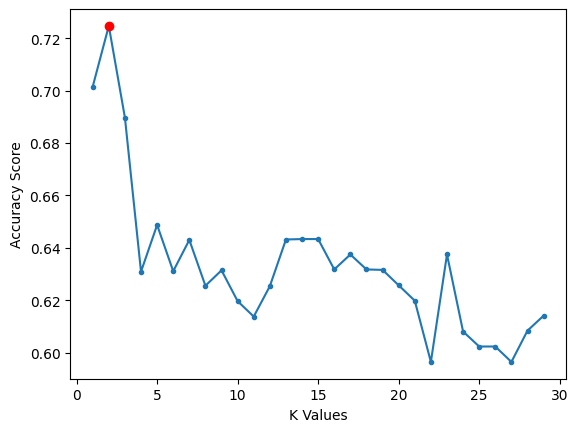

In [589]:
plt.figure()
plt.scatter([best_k], [knn_scores[best_k-1]], c="r", marker="o", zorder=1)
plt.plot(k_vals, knn_scores, ".-", zorder=0)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

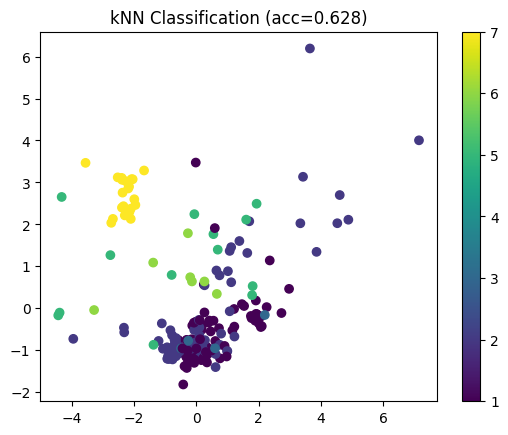

In [590]:
plt.figure()
plt.scatter(compressed[:, 0], compressed[:, 1], c=knn_classified_data)
plt.title(f"kNN Classification (acc={knn_score:.3f})")
plt.colorbar()
plt.show()

In [591]:
# SVM
svm_kernels = ["linear", "poly", "rbf"]
svm_degrees = [2, 3]

svm_scores = {}

for kernel in svm_kernels:
    if kernel == "poly":
        for degree in svm_degrees:
            svm = SVC(kernel=kernel, degree=degree)
            scores = cross_val_score(svm, X_train, y_train, cv=5)
            svm_scores[(kernel, degree)] = np.mean(scores)
    else:
        svm = SVC(kernel=kernel)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        svm_scores[(kernel)] = np.mean(scores)

print(svm_scores)
# print(svm_scores.get)
best_svm = max(svm_scores, key=svm_scores.get)
print(best_svm)


{'linear': 0.6492436974789916, ('poly', 2): 0.5379831932773109, ('poly', 3): 0.5084033613445378, 'rbf': 0.7131092436974791}
rbf


In [592]:
# Train best SVM machine
if best_svm[0] == "poly":
    svm_classifier = SVC(kernel=best_svm[0], degree=best_svm[1])
else:
    svm_classifier = SVC(kernel=best_svm)
    
svm_classifier.fit(X_train, y_train)
svm_classified_data = svm_classifier.predict(inputs)
svm_score = svm_classifier.score(X_test, y_test)

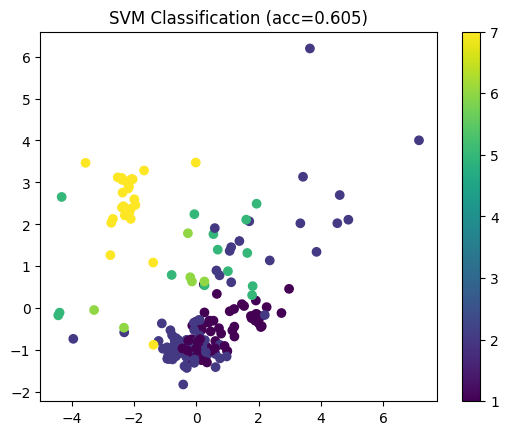

In [593]:
plt.figure()
plt.scatter(compressed[:, 0], compressed[:, 1], c=svm_classified_data)
plt.title(f"SVM Classification (acc={svm_score:.3f})")
plt.colorbar()
plt.show()

### Task 1.3 – Assessment of classification 

After identifying the best model parameters in the previous task, the classification models you have implemented must be assessed. To do this you are required to assess the accuracy for each model. You may use the accuracy implementation available to do this. It is not sufficient to report a single accuracy score. You must use cross-validation to report training results and report these values using a plot. You will also need to write a summary analysing your results and findings. 

> Accuracy is used in combination with crossvalidation, and the results are presented with a boxplot. The code is efficient and well organised. Analysis of the results is complete and well understood. 

In [594]:
# Data preparation for boxplots

knn_scores = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5)
    for k in k_vals
]

svm_scores = []
for kernel in svm_kernels:
    if kernel == "poly":
        for degree in [2, 3]:
            score = cross_val_score(SVC(kernel=kernel, degree=degree), X_train, y_train, cv=5)
            svm_scores.append(score)  
    else:
        score = cross_val_score(SVC(kernel=kernel), X_train, y_train, cv=5)
        svm_scores.append(score)

boxplot_data = [np.concatenate(knn_scores), np.concatenate(svm_scores)]

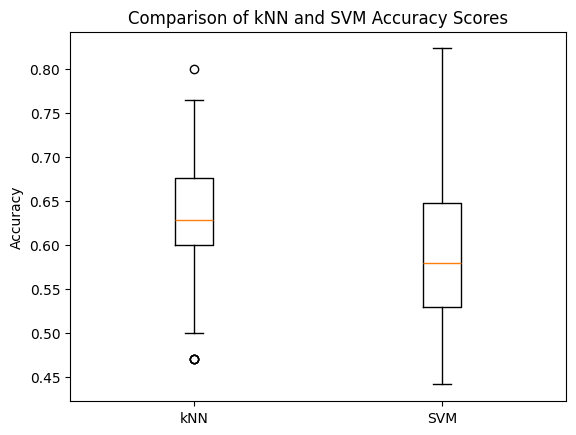

In [595]:
plt.figure()
plt.boxplot(boxplot_data, labels=["kNN", "SVM"])
plt.ylabel("Accuracy")
plt.title("Comparison of kNN and SVM Accuracy Scores")
plt.show()

In [596]:
print(f"KNN Average Accuracy: {np.mean(knn_scores)}")
print(f"SVM Average Accuracy: {np.mean(svm_scores)}")

KNN Average Accuracy: 0.6330802665893943
SVM Average Accuracy: 0.6021848739495799


In [597]:
print(f"KNN Accuracies Min/Max: {np.min(knn_scores):.3f}:{np.max(knn_scores):.3f} (Delta: {np.max(knn_scores)-np.min(knn_scores):.3f})")
print(f"SVM Accuracies Min/Max: {np.min(svm_scores):.3f}:{np.max(svm_scores):.3f} (Delta: {np.max(svm_scores)-np.min(svm_scores):.3f})")

KNN Accuracies Min/Max: 0.471:0.800 (Delta: 0.329)
SVM Accuracies Min/Max: 0.441:0.824 (Delta: 0.382)


There is some variation in accuracy between runs that makes directly comparing the kNN and SVM models difficult.

Performance of both models was carried out through cross-validation with accuracy scores being calculated for different parameters. For the kNN model, this was a range of $K$ values from 1 to 30. The optimal $k$ value is the value which resulted in the highest accuracy score. The SVM model was tested with different kernel functions: linear, polynomial (using degrees of 2 and 3) and radial basis function (rbf).

This accuracy testing indicated that using a the RBF kernel on the SVM provided the model with the highest accuracy score. For the kNN model, using a low k-value tended to result in the highest accuracy score.

Both models were evaluated using a 5-fold cross-validation.

> "We can see that K-Fold Cross-Validation provides a more robust and reliable performance estimate because it reduces the impact of data variability. By using multiple training and testing cycles, it minimizes the risk of overfitting to a particular data split. This method also ensures that every data point is used for both training and validation, which results in a more comprehensive evaluation of the model's performance."
>
> [Datacamp: A Comprehensive Guide to K-Fold Cross Validation](https://www.datacamp.com/tutorial/k-fold-cross-validation)

Using too low of a $k$ value is likely to result in overfitting the data; that is a limitation of this implementation. The `best_k` variable sometimes gets calculated to be `1`, and so this is what the model uses. This will result in poor generalisation when encountering new data.

## Part 2 – Optimisation

The second part of this assignment requires you to construct an algorithm that can optimise single-objective optimisation problems. 

The problems are as follows:

Problem | Formulation
--- | ---
Schaffer Function N.2 | $f(x, y) = 0.5 + \frac{\sin(x^2-y^2)^2 - 0.5}{[1+0.001(x^2+y^2)]^2}$
Modified Ackley Function | $f(x, y) = -20 \exp \left(-0.2 \sqrt{0.5 (x^2 + y^2)} \right) - \exp \left[ 0.5 \left(\cos(2\pi x) + \cos(2\pi y) \right) \right] + 20$
Easom Function | $f(x, y) = -\cos(x) \cos(y) \exp \left(-\left( (x - \pi)^2 + (y - \pi)^2 \right) \right)$

Each solution should have $D = 2$ continuous decision variables that can take any value (you are recommended to start with random values between -5 and 5 for all three problems).


### Task 2.1 – Generation of random solutions

You must use an evolutionary algorithm (EA). When evaluating an EA it is standard to compare against randomness. Generate 500 random solutions to the problem and plot their fitness values. You should plot the x and y values and colour the solutions according to their fitness value.

> The data is loaded and the fitness function is correct. Random solutions are generated correctly. The code to do so is efficiently structured.

In [598]:
def schaffer(x, y):
    return 0.5 + (np.sin(x**2 - y**2)**2 - 0.5) / (1 + 0.001 * (x**2 + y**2))**2

def modified_ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + 20

def easom(x, y):
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

In [599]:
n = 500
x_values = np.random.uniform(-5, 5, n)
y_values = np.random.uniform(-5, 5, n)

In [600]:
schaffer_fitness = schaffer(x_values, y_values)
ackley_fitness = modified_ackley(x_values, y_values)
easom_fitness = easom(x_values, y_values)

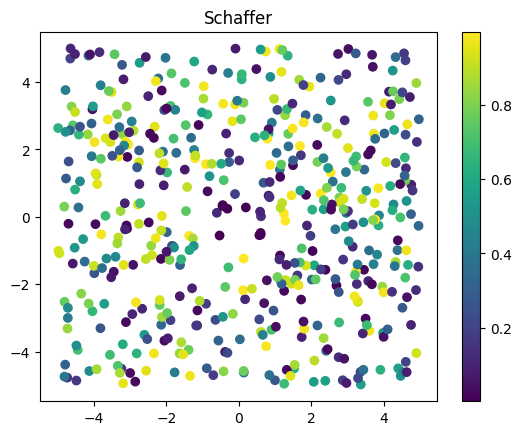

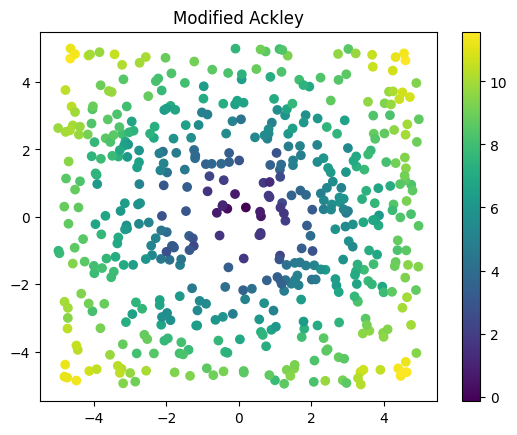

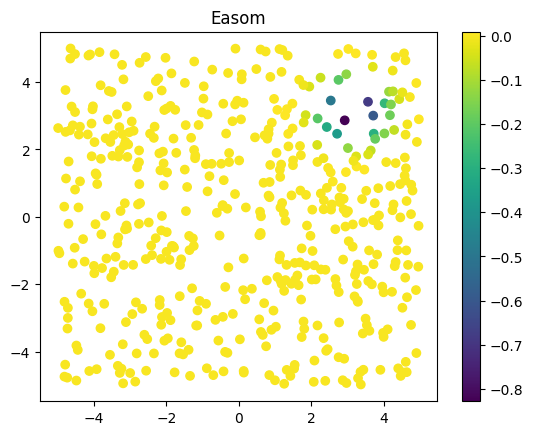

In [601]:
def plot_fitness(fitness_values, title):
    plt.figure()
    plt.scatter(x_values, y_values, c=fitness_values)
    plt.title(title)
    plt.colorbar()
    plt.show()
    
plot_fitness(schaffer_fitness, "Schaffer")
plot_fitness(ackley_fitness, "Modified Ackley")
plot_fitness(easom_fitness, "Easom")

### Task 2.2 – Algorithm implementation

You should implement a population-based evolutionary algorithm as described in the lectures. Your algorithm must have the following features:
- A crossover operator that performs uniform crossover.
- A mutation operator that performs an additive Gaussian mutation.
- A selection operator that combines a generation’s parent and child populations and identifies the parent solutions for the next generation.

> The mutation operators and algorithm have been implemented correctly. The fitness archive stores fitnesses correctly. The code is efficiently structured and well organised.

In [602]:
from enum import Enum
from random import choices, random
import time

In [ ]:
class FitnessFunction(Enum):
    SCHAFFER = schaffer
    ACKLEY = modified_ackley
    EASOM = easom
    
# Set up parameters for GA
population_size = 100
generations_limit = 100
fitness_function = FitnessFunction.SCHAFFER

In [ ]:
def generate_population(population_size):
    return np.random.uniform(-5, 5, (population_size, 2))


def selection_pair(population, fitness_func):
    return choices(
        population=population,
        weights=[fitness_func(*genome) for genome in population],
        k=2
    )


def uniform_crossover(a, b): # returns offspring
    mask = [random() < 0.5 for i in range(2)]
    offspring_a = [a[i] if mask[i] else b[i] for i in range(2)]
    offspring_b = [b[i] if mask[i] else a[i] for i in range(2)]
    return (offspring_a, offspring_b)


def mutate(offspring, rate=0.2):
    mutation = np.random.normal(0, rate, 2)
    return (offspring[0] + mutation[0], offspring[1] + mutation[1])


def evolve(fitness_func: FitnessFunction, generations_limit=generations_limit):
    population = generate_population(population_size)
    
    for i in range(generations_limit):
        population = sorted(
            population,
            key = lambda genome: fitness_func(*genome),
            reverse=True
        )
        
        next_generation = population[0:2]
        
        for j in range(int(len(population) / 2) - 1):
            parents = selection_pair(population, fitness_func)
            offspring_a, offspring_b = uniform_crossover(parents[0], parents[1])
            
            offspring_a = mutate(offspring_a)
            offspring_b = mutate(offspring_b)
            next_generation += [offspring_a, offspring_b]
            
        population = next_generation
    
    population = sorted(
        population,
        key = lambda genome: fitness_func(*genome),
        reverse=True
    )
    
    return population, i # where i is the number of generations

In [606]:
start = time.time()
population, generations = evolve(fitness_function)
end = time.time()


### Task 2.3 – Visualisation of results

Modify your optimiser to record the average fitness at each generation. Then, after your optimiser has run, produce a plot showing the change in average fitness over the runtime of the algorithm.

Your visualization code must be separate from the optimiser.

> A graph shows the correct results and the correct experimental setup has been followed.

***

## Resources

[Genertic Algorithms Explained By Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)
<br>

[Grokking Algorithms](C:/Users/richa/Desktop/ebooks/Aditya%20Bhargava%20-%20Grokking%20Algorithms_%20An%20illustrated%20guide%20for%20programmers%20and%20other%20curious%20people-Manning%20Publications%20(2016).pdf)